In [1]:
import pandas as pd
import numpy as np
import time
import joblib

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
x = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap6')
y = joblib.load('score_asap6')

### Plot the data using t-sne

In [3]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)
tsne_results = tsne.fit_transform(x)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

import pandas as pd
data = pd.DataFrame()
data['tsne-2d-one'] = tsne_results[:,0]
data['tsne-2d-two'] = tsne_results[:,1]
data['y'] = y
data

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1800 samples in 0.063s...
[t-SNE] Computed neighbors for 1800 samples in 0.845s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1800
[t-SNE] Computed conditional probabilities for sample 1800 / 1800
[t-SNE] Mean sigma: 8.432028
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.335461
[t-SNE] KL divergence after 1000 iterations: 0.378399
t-SNE done! Time elapsed: 13.762603044509888 seconds


,tsne-2d-one,tsne-2d-two,y
0,-32.992233,9.476477,2
1,17.317926,5.869191,3
2,-5.349285,-5.285082,4
3,23.621706,6.884614,1
4,-5.717835,-12.341780,3
...,...,...,...
1795,-16.786224,-21.135380,0
1796,8.752431,40.106560,2
1797,-21.859507,23.603285,3
1798,9.884665,39.048504,2


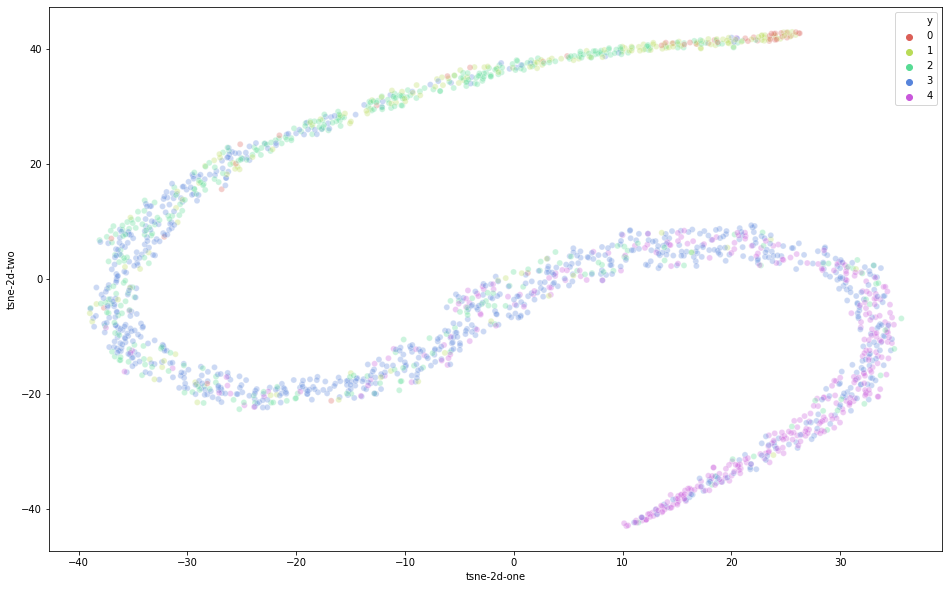

In [4]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='y',
    palette=sns.color_palette("hls", 5),
    data=data,
    legend="full",
    alpha=0.3
)

### Plot the data using PCA

In [5]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)

data['pca-one'] = pca_result[:,0]
data['pca-two'] = pca_result[:,1]
data

,tsne-2d-one,tsne-2d-two,y,pca-one,pca-two
0,-32.992233,9.476477,2,-207.718787,-3.907877
1,17.317926,5.869191,3,180.480041,5.139123
2,-5.349285,-5.285082,4,62.458796,-20.516194
3,23.621706,6.884614,1,210.516471,-9.960695
4,-5.717835,-12.341780,3,47.393289,-9.306780
...,...,...,...,...,...
1795,-16.786224,-21.135380,0,-25.654263,-0.894168
1796,8.752431,40.106560,2,-545.029898,12.238592
1797,-21.859507,23.603285,3,-301.405429,-5.195429
1798,9.884665,39.048504,2,-554.660733,-6.908755


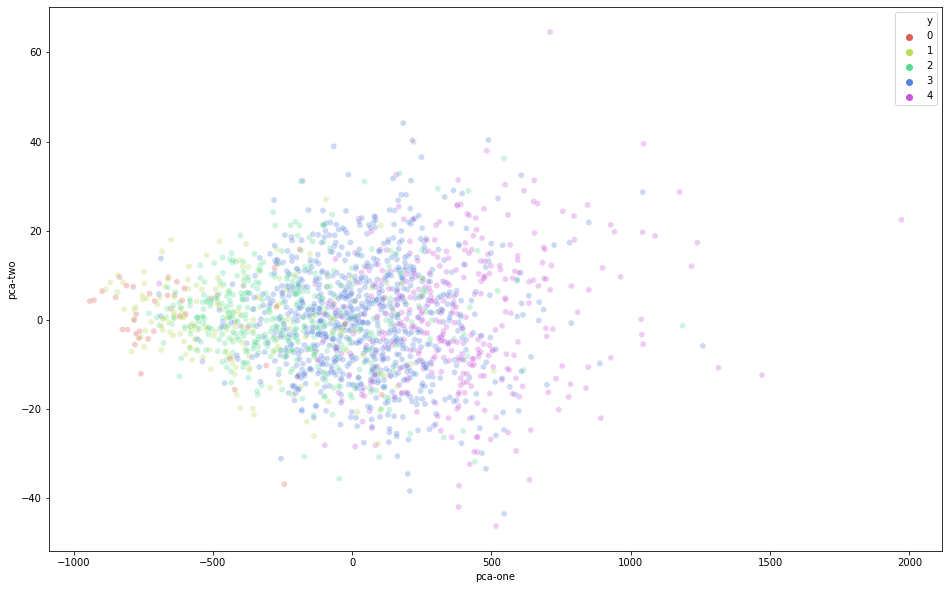

In [6]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue='y',
    palette=sns.color_palette("hls", 5),
    data=data,
    legend="full",
    alpha=0.3
)

## Plot PCA and T-SNE

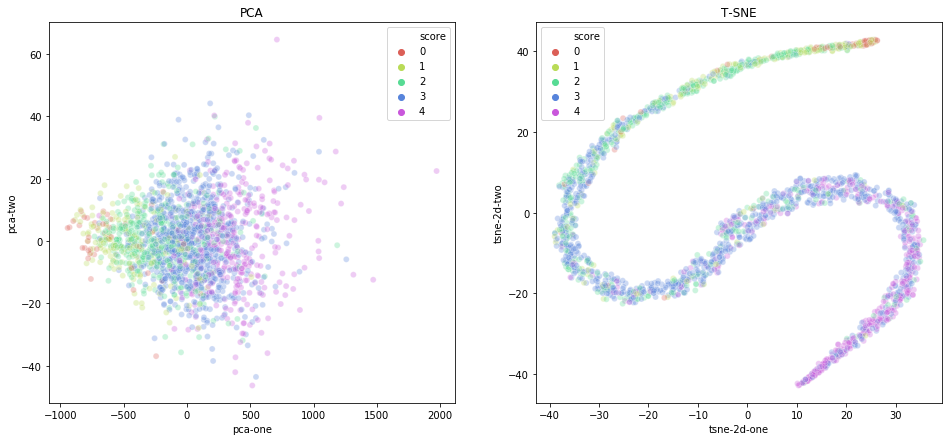

In [7]:
data['score'] = y

plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title('PCA')
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="score",
    palette=sns.color_palette("hls", 5),
    data=data,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('T-SNE')
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="score",
    palette=sns.color_palette("hls", 5),
    data=data,
    legend="full",
    alpha=0.3,
    ax=ax2
)

plt.savefig('pca_tsne.png', bbox_inches="tight")

## Only plot 12 interpretable features

In [11]:
x_12 = x[:, 12:]
x_12.shape

(1800, 768)

In [12]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000)
tsne_results_12 = tsne.fit_transform(x_12)

pca = PCA(n_components=2)
pca_result_12 = pca.fit_transform(x_12)

data_12 = pd.DataFrame()
data_12['tsne-2d-one'] = tsne_results_12[:,0]
data_12['tsne-2d-two'] = tsne_results_12[:,1]
data_12['pca-one'] = pca_result_12[:,0]
data_12['pca-two'] = pca_result_12[:,1]
data_12['score'] = y

data_12

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1800 samples in 0.071s...
[t-SNE] Computed neighbors for 1800 samples in 5.719s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1800
[t-SNE] Computed conditional probabilities for sample 1800 / 1800
[t-SNE] Mean sigma: 1.335561
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.020462
[t-SNE] KL divergence after 5000 iterations: 2.066942


,tsne-2d-one,tsne-2d-two,pca-one,pca-two,score
0,11.283525,-26.997801,-2.423388,-1.014496,2
1,-2.513173,7.176719,0.551171,0.382402,3
2,4.233697,-6.067472,-1.085967,-0.538799,4
3,-23.780668,15.537845,3.233435,-0.510846,1
4,10.502037,-1.390877,-1.137577,0.345693,3
...,...,...,...,...,...
1795,-8.143721,13.207956,0.593060,0.637960,0
1796,13.550390,9.580056,-1.617612,1.169361,2
1797,12.747906,-15.076998,-2.209875,-0.649788,3
1798,10.712820,-24.637695,-4.999932,-3.395695,2


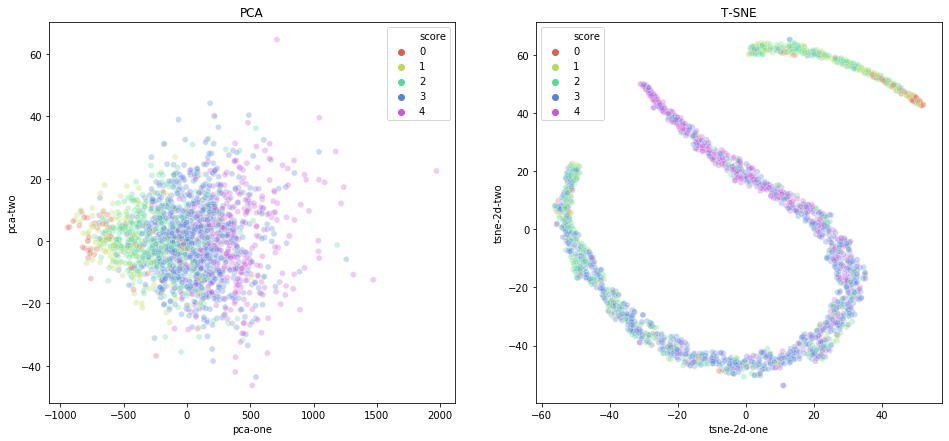

In [10]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title('PCA')
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="score",
    palette=sns.color_palette("hls", 5),
    data=data_12,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('T-SNE')
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="score",
    palette=sns.color_palette("hls", 5),
    data=data_12,
    legend="full",
    alpha=0.3,
    ax=ax2
)

plt.savefig('pca_tsne.png', bbox_inches="tight")

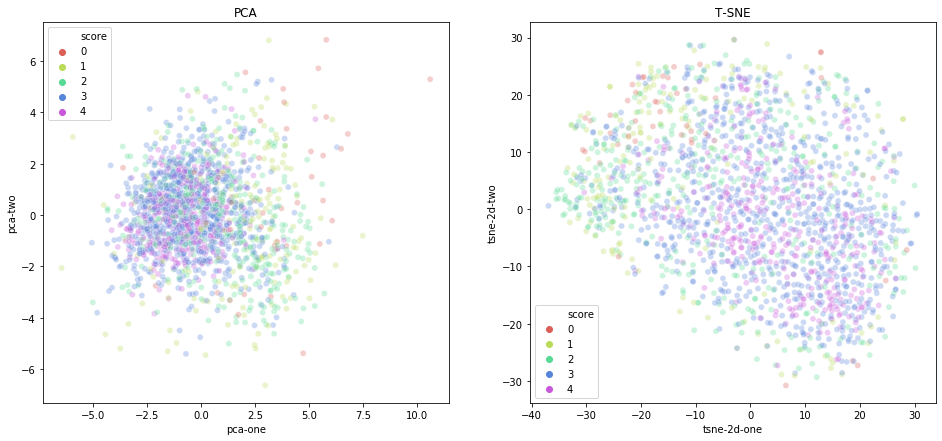

In [13]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title('PCA')
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="score",
    palette=sns.color_palette("hls", 5),
    data=data_12,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('T-SNE')
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="score",
    palette=sns.color_palette("hls", 5),
    data=data_12,
    legend="full",
    alpha=0.3,
    ax=ax2
)

plt.savefig('pca_tsne.png', bbox_inches="tight")

### 3 dimensions PCA

In [14]:
pca = PCA(n_components=3)
result = pca.fit_transform(x)

tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=5000)
result = tsne.fit_transform(x)

xa = result[:,0]
xb = result[:,1] 
xc = result[:,2]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1800 samples in 0.056s...
[t-SNE] Computed neighbors for 1800 samples in 0.774s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1800
[t-SNE] Computed conditional probabilities for sample 1800 / 1800
[t-SNE] Mean sigma: 8.186047
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.759037
[t-SNE] KL divergence after 5000 iterations: 0.303944


No handles with labels found to put in legend.


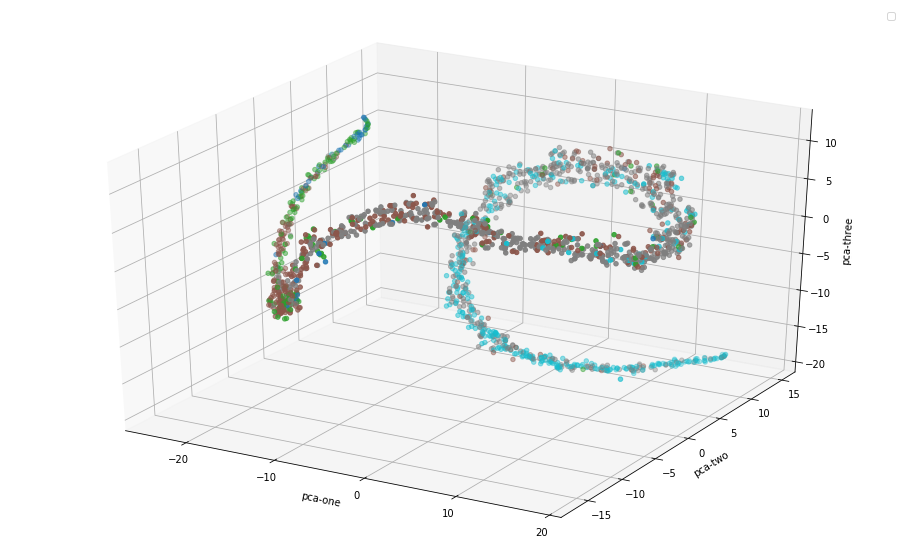

In [15]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=xa, 
    ys=xb, 
    zs=xc, 
    c=y, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
ax.legend()
plt.show()